In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Завантажимо дані

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train = train[["id","text","target"]]
test = test[["id",'text']]

train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


# Токенізація, видалення стоп-слів та пунктуації

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# split into words
for df in [train, test]:
    df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
    df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha()])
    df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if (word not in stop_words)])
    df['text'] = df['tokens'].apply(lambda x: " ".join(x))
train

,id,text,target,tokens
0,1,Our Deeds Reason earthquake May ALLAH Forgive us,1,"[Our, Deeds, Reason, earthquake, May, ALLAH, F..."
1,4,Forest fire near La Ronge Sask Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,All residents asked place notified officers No...,1,"[All, residents, asked, place, notified, offic..."
3,6,people receive wildfires evacuation orders Cal...,1,"[people, receive, wildfires, evacuation, order..."
4,7,Just got sent photo Ruby Alaska smoke wildfire...,1,"[Just, got, sent, photo, Ruby, Alaska, smoke, ..."
...,...,...,...,...
7608,10869,Two giant cranes holding bridge collapse nearb...,1,"[Two, giant, cranes, holding, bridge, collapse..."
7609,10870,TheTawniest The control wild fires California ...,1,"[TheTawniest, The, control, wild, fires, Calif..."
7610,10871,UTC S Volcano Hawaii http,1,"[UTC, S, Volcano, Hawaii, http]"
7611,10872,Police investigating collided car Little Portu...,1,"[Police, investigating, collided, car, Little,..."


In [4]:
def plot_ngrams(bi):
    word = []
    idx = []
    for i in range(len(bi)):
        word.append(str(bi[i][0]))
        idx.append(bi[i][1])
    plt.figure(figsize = (10,8))
    plt.bar(word,idx)
    plt.xticks(word, word, rotation = 'vertical')
    plt.xlabel('Ngrams')
    plt.ylabel('Frequency')
    plt.title('Ngram with Frequency')
    plt.show()

# Візуалізація бі-грам для класу 0

In [5]:
#bigrams, trigrams
from nltk.util import ngrams
import collections
tex = ''
for i in train['text'][train['target']==0] : 
    tex = tex + str(i.strip('[]'))
tok = tex.split()
b_grams = ngrams(tok, 2) 
t_grams = ngrams(tok,3)
bigrams = collections.Counter(b_grams)
trigrams = collections.Counter(t_grams)
bi= bigrams.most_common(10)
ti= trigrams.most_common(10)

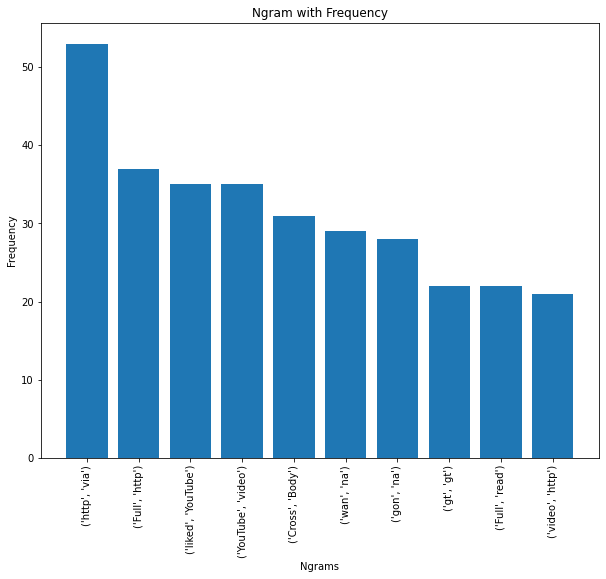

In [6]:
plot_ngrams(bi)

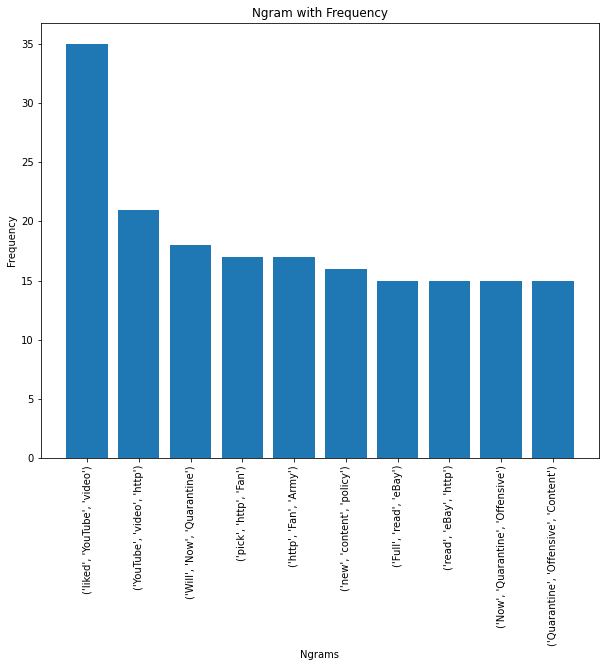

In [7]:
plot_ngrams(ti)

# Візуалізація бі-грам для класу 1

In [8]:
#bigrams, trigrams
from nltk.util import ngrams
import collections
tex = ''
for i in train['text'][train['target']==1] : 
    tex = tex + str(i.strip('[]'))
tok = tex.split()
b_grams = ngrams(tok, 2) 
t_grams = ngrams(tok,3)
bigrams = collections.Counter(b_grams)
trigrams = collections.Counter(t_grams)
bi= bigrams.most_common(10)
ti= trigrams.most_common(10)

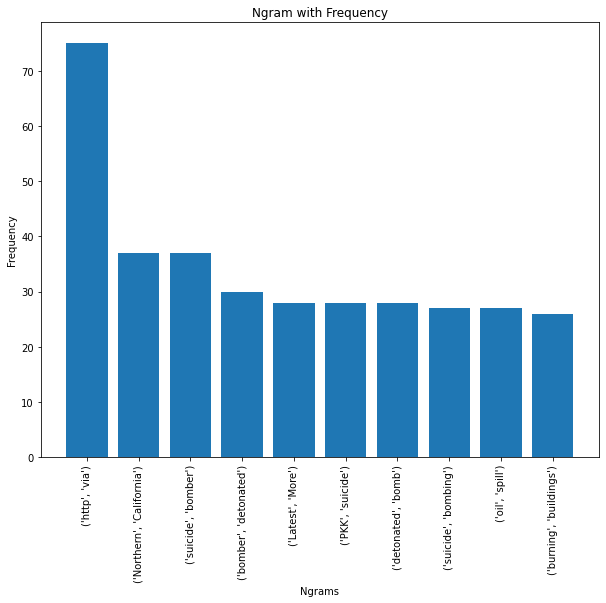

In [9]:
plot_ngrams(bi)

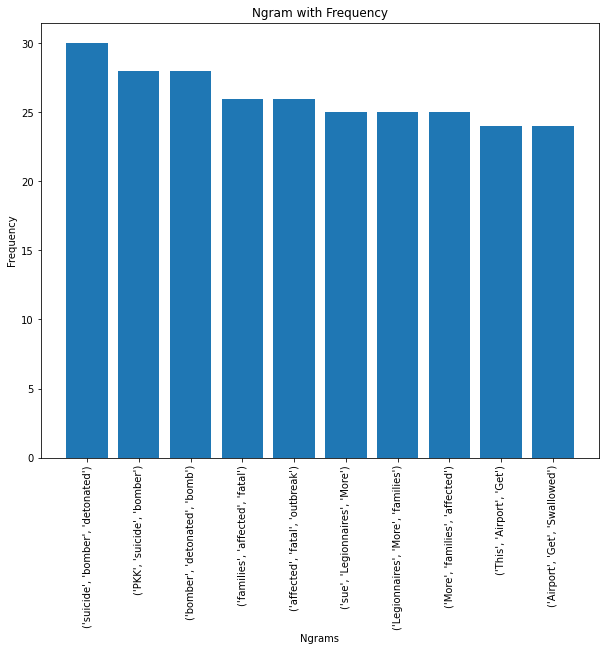

In [10]:
plot_ngrams(ti)

# Візуалізація WordCloud

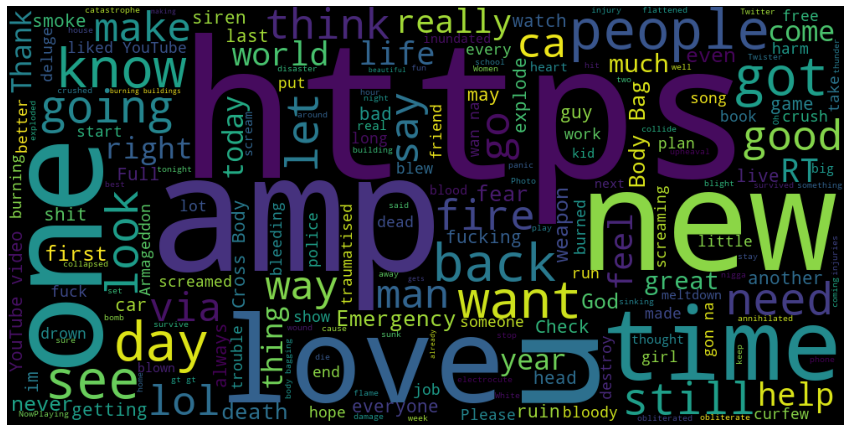

In [11]:
from wordcloud import WordCloud
unique_string=(" ").join(train["text"][train['target']==0].values)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

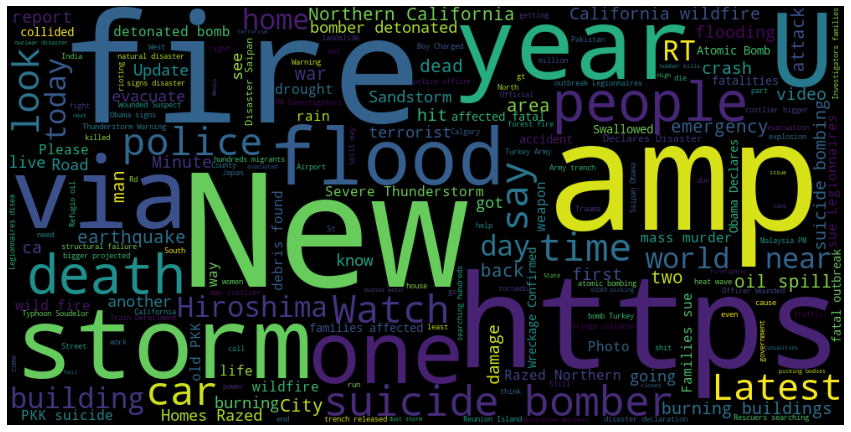

In [12]:
from wordcloud import WordCloud
unique_string=(" ").join(train["text"][train['target']==1].values)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Векторизація тексту

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

train_vectorized = tfidf.fit_transform(train['text'])
test_vectorized = tfidf.transform(test['text'])

# Класифікація тексту

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

kfold = StratifiedKFold(n_splits=5)

for train_index, val_index in kfold.split(train_vectorized, train['target'].values):
    X_train, X_val = train_vectorized[train_index], train_vectorized[val_index]
    y_train, y_val = train['target'].values[train_index], train['target'].values[val_index]
    
    #lr = LogisticRegression(solver='newton-cg')
    lr = LinearSVC()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_val)
    print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       868
           1       0.77      0.51      0.61       655

    accuracy                           0.72      1523
   macro avg       0.74      0.70      0.70      1523
weighted avg       0.73      0.72      0.71      1523

              precision    recall  f1-score   support

           0       0.65      0.72      0.69       869
           1       0.57      0.49      0.53       654

    accuracy                           0.62      1523
   macro avg       0.61      0.61      0.61      1523
weighted avg       0.62      0.62      0.62      1523

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       869
           1       0.63      0.58      0.61       654

    accuracy                           0.67      1523
   macro avg       0.67      0.66      0.66      1523
weighted avg       0.67      0.67      0.67      1523

              preci

# LatentDirichletAllocation - алгоритм для пошуку прихованих топіків у колекції документів, та ймовірності належності до них 

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation()
print( lda.fit_transform(train_vectorized[train['target']==0]) )

[[0.04143088 0.04144737 0.04142937 ... 0.04142744 0.04143362 0.04143337]
 [0.04210984 0.62099667 0.04211441 ... 0.0421084  0.04211123 0.04211101]
 [0.04157369 0.04157475 0.04157872 ... 0.62582142 0.04157462 0.04157455]
 ...
 [0.02443414 0.02443256 0.02443561 ... 0.02443291 0.02443728 0.02443251]
 [0.04149209 0.04149007 0.04150974 ... 0.04148933 0.04149082 0.62653471]
 [0.75158903 0.02760692 0.02760109 ... 0.02759684 0.02760202 0.02759915]]


In [19]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation()
print( lda.fit_transform(train_vectorized[train['target']==1]) )

[[0.02645815 0.0264561  0.02645402 ... 0.02645841 0.02645422 0.76189184]
 [0.02798264 0.02797437 0.74816987 ... 0.02797309 0.02797316 0.02800231]
 [0.02374528 0.02374417 0.02374825 ... 0.02374603 0.02375497 0.02375549]
 ...
 [0.03508565 0.03508577 0.03508598 ... 0.03508597 0.03508563 0.03508633]
 [0.78900288 0.02344446 0.02345039 ... 0.02344295 0.0234408  0.02344438]
 [0.02375436 0.02375428 0.78621106 ... 0.02375427 0.02375408 0.02375468]]
